### Reporte EDA

In [1]:
#IMPORTS
import pandas as pd 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import re
import urllib
from matplotlib import image as mpimg


In [2]:
# Definimos lo que pondremos como valores nulos
na_vals = ["NA", "", "null", "NULL", "NaN"]
# carga datasets

customers = pd.read_csv('dataset/olist_customers_dataset.csv', na_values=na_vals)
geolocation = pd.read_csv('dataset/olist_geolocation_dataset.csv', na_values=na_vals)
order_items = pd.read_csv('dataset/olist_order_items_dataset.csv', na_values=na_vals)
payments = pd.read_csv('dataset/olist_order_payments_dataset.csv', na_values=na_vals)
reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv', na_values=na_vals)
orders = pd.read_csv('dataset/olist_orders_dataset.csv', na_values=na_vals)
products = pd.read_csv('dataset/olist_products_dataset.csv', na_values=na_vals)
sellers = pd.read_csv('dataset/olist_sellers_dataset.csv', na_values=na_vals)
category_translation = pd.read_csv('dataset/product_category_name_translation.csv', na_values=na_vals)


### Evaluación de calidad de datos
Revisión inicial:

In [3]:
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "payments": payments,
    "reviews": reviews,
    "orders": orders,
    "products": products,
    "sellers": sellers,
    "category_translation": category_translation
}
# Vemos de una vez los primeros datos, la forma y los tipos de datos
# de cada dataset
# y la cantidad de valores nulos
for name, df in datasets.items():
    print(f"\n -- {name.upper()} --  Shape: {df.shape}")
    display(df.head(2)) 
    print(df.info())
    print(df.isnull().sum())



 -- CUSTOMERS --  Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 -- GEOLOCATION --  Shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 -- ORDER_ITEMS --  Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 -- PAYMENTS --  Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 -- REVIEWS --  Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

 -- ORDERS --  Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
prod

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

 -- CATEGORY_TRANSLATION --  Shape: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64


# Que se puede concluir? 
* El name translation no nos va a servir ahorita.. Solo son la tradccion de las palabras. Asi que no lo tomaremos en cuenta en los resumenes estadisticos asi que lo quitamos por el momento.
* Que hay muchos valores nulos en unos casos asi que: 

In [4]:
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "payments": payments,
    "reviews": reviews,
    "orders": orders,
    "products": products,
    "sellers": sellers,
}

Tratar con los valores nulos:

In [5]:
# Los comentarios de los CSV estan en portugues pero nosotros los vamos a fillear al ingles porque precsamente tenemos un dataset
# de traduccion
# y los nombres de las columnas en ingles
reviews["review_comment_title"].fillna("No Title", inplace=True)
reviews["review_comment_message"].fillna("No Comment", inplace=True)

/tmp/ipykernel_42695/154587573.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews["review_comment_title"].fillna("No Title", inplace=True)
/tmp/ipykernel_42695/154587573.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

### Ahora con los nulos de olist_orders_dataset.csv
* order_approved_at
* order_delivered_carrier_date 
* order_delivered_customer_date. 
```markdown
```

Esas 3 columnas tienen valores nulos pero cada una tiene el por que de ser asi por ejemplo. Pedido nunca fue aprobado (cancelado o en revisión) o El pedido no fue enviado aún o El pedido aún no llegó al cliente

### Ahora con los nulos de *olist_products_dataset.csv*
* product_category_name -> No se conoce la categoría del producto


Aca si podemos entonces hacer eso de llenar con "unknowm"

In [6]:
products['product_category_name'].fillna('unknown', inplace=True)

# Le calculamos la mediana a las columnas cuyos valores nulos son numericos
# y los rellenamos con la mediana
# de cada columna
# Las columnas que tienen valores nulos son:
cols_a_llenar = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in cols_a_llenar:
    products[col] = products[col].fillna(products[col].median())



/tmp/ipykernel_42695/838572696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna('unknown', inplace=True)


In [7]:
# Verificamos de nuevo valores nulos:
for name, df in datasets.items():
    print(f"\n -- {name.upper()} --  Shape: {df.shape}")
    display(df.head(2)) 
    print(df.info())
    print(df.isnull().sum())


 -- CUSTOMERS --  Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 -- GEOLOCATION --  Shape: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 -- ORDER_ITEMS --  Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

 -- PAYMENTS --  Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 -- REVIEWS --  Shape: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

 -- ORDERS --  Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_c

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


### Resúmenes estadísticos

Podemos pasar a ver resumenes estadisticos.

In [8]:
for name, df in datasets.items():
    print(f"\n>>> Estadísticas para {name}")
    display(df.describe(include='all'))



>>> Estadísticas para customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN



>>> Estadísticas para geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN



>>> Estadísticas para order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000



>>> Estadísticas para payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500



>>> Estadísticas para reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,No Title,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN



>>> Estadísticas para orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



>>> Estadísticas para products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000



>>> Estadísticas para sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Visualización de patrones clave

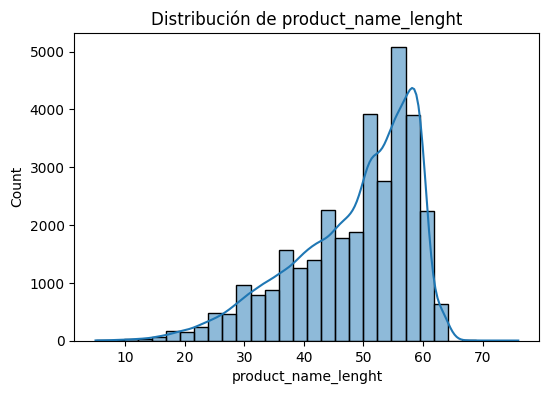

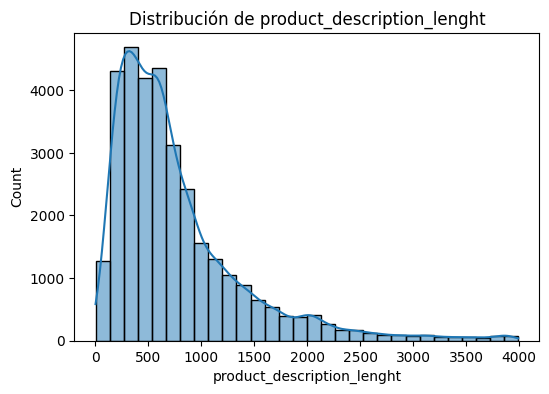

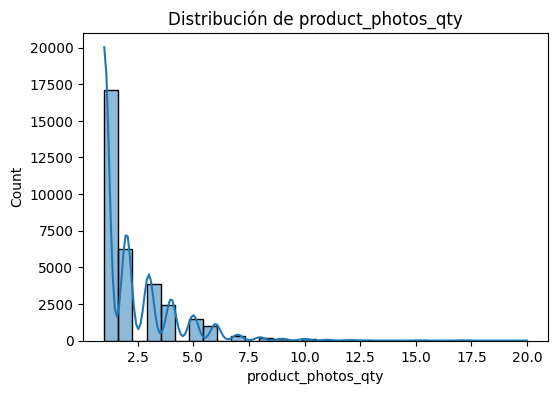

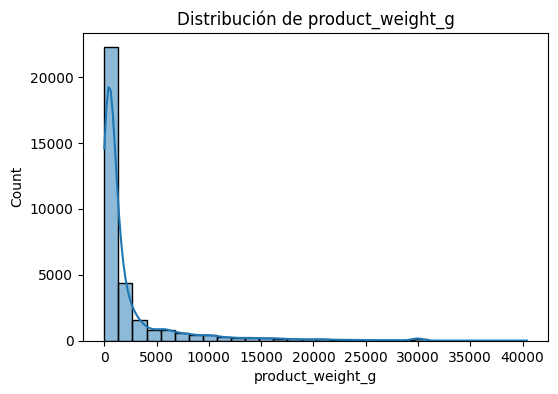

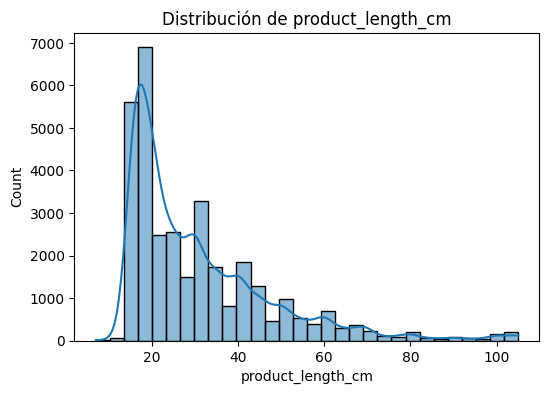

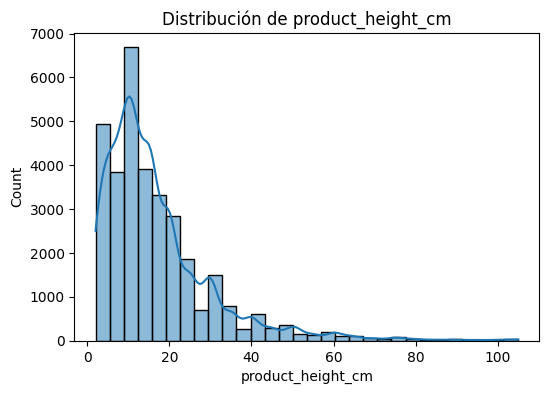

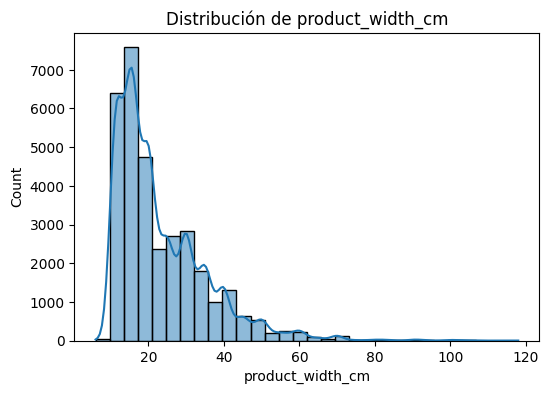

In [9]:
## Distribuciones individuales
# Para ver cómo se comportan las variables numéricas y categóricas: en productos.
numeric_cols = products.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(products[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()

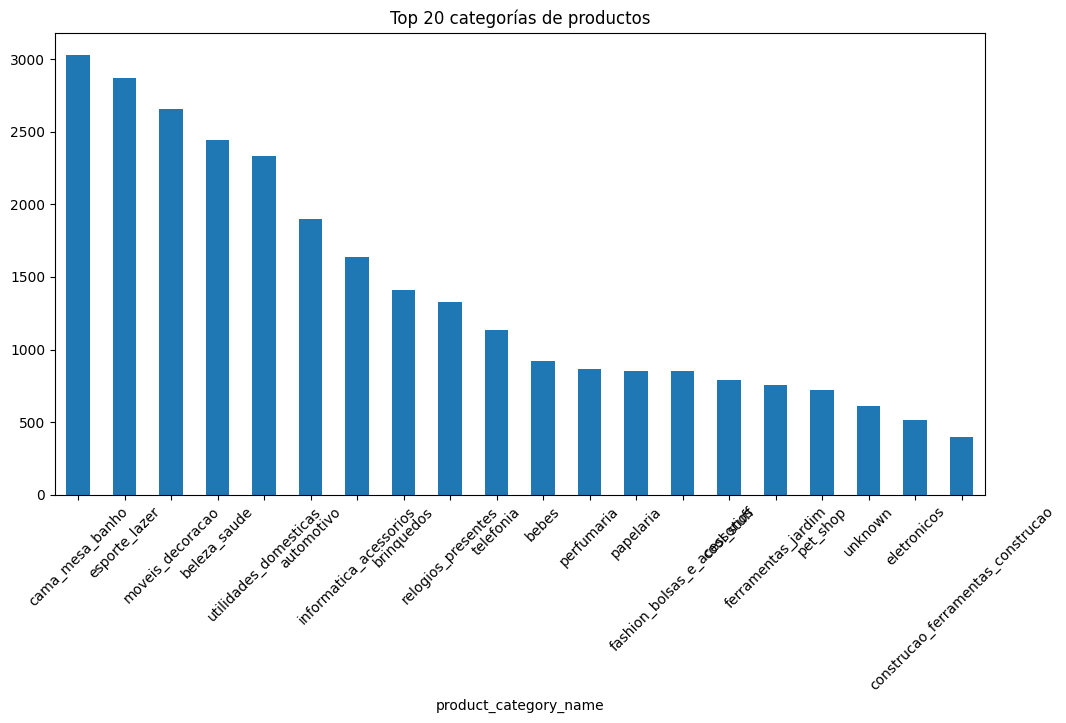

In [10]:
#COmportamiento de en la tabla productos.
plt.figure(figsize=(12,6))
products['product_category_name'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 categorías de productos")
plt.xticks(rotation=45)
plt.show()


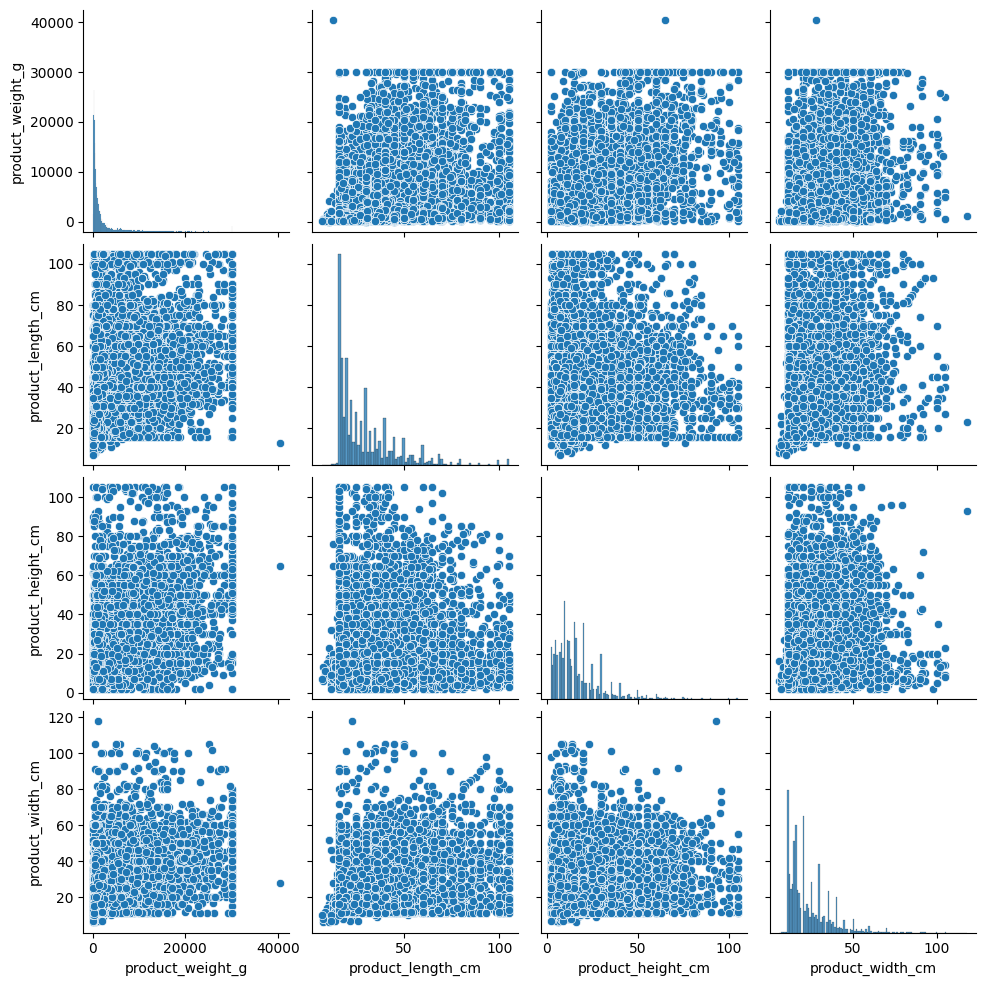

In [11]:
#Relaciones entre variables
#Por ejemplo, ¿cómo se relaciona el peso con el tamaño del producto?
sns.pairplot(products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']])
plt.show()


### Podemos hacerlo un poco mas complicado:
orders + order_items + products

    Tiempo de entrega por categoría:

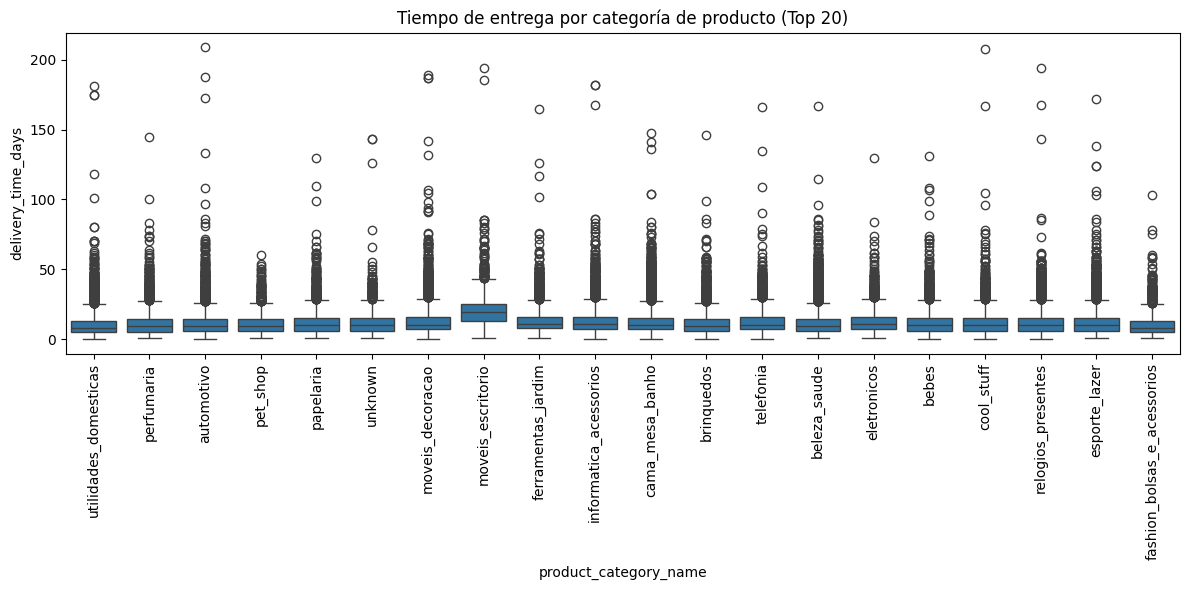

In [12]:
merged = orders.merge(order_items, on='order_id').merge(products, on='product_id')
# Convertir fechas
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])
merged['order_delivered_customer_date'] = pd.to_datetime(merged['order_delivered_customer_date'])

# Crear columna de días de entrega
merged['delivery_time_days'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days

# Contar top 20 categorías más comunes
top_cats = merged['product_category_name'].value_counts().nlargest(20).index

# Filtrar solo esas categorías
top_merged = merged[merged['product_category_name'].isin(top_cats)]

# Boxplot limitado
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_merged, x='product_category_name', y='delivery_time_days')
plt.xticks(rotation=90)
plt.title("Tiempo de entrega por categoría de producto (Top 20)")
plt.tight_layout()
plt.show()



Tal vez ver Métodos de pago más usados:

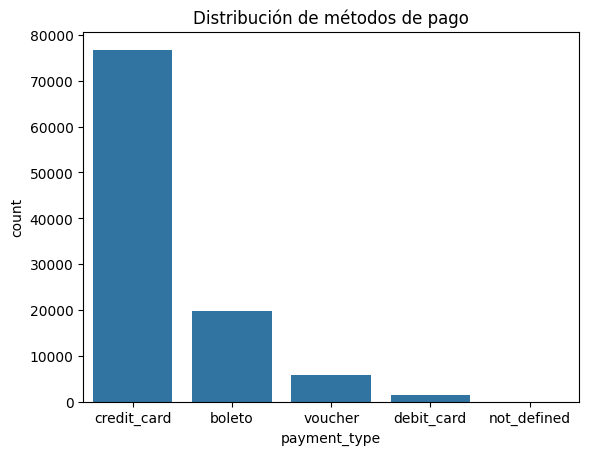

In [13]:
sns.countplot(data=payments, x='payment_type', order=payments['payment_type'].value_counts().index)
plt.title("Distribución de métodos de pago")
plt.show()

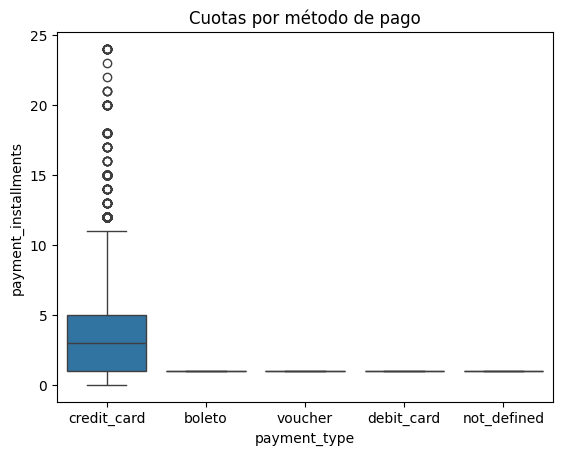

In [14]:
# O en este mismo analizar el número de cuotas por método de pago:
sns.boxplot(data=payments, x='payment_type', y='payment_installments')
plt.title("Cuotas por método de pago")
plt.show()


¿Qué tan satisfechos están los clientes?

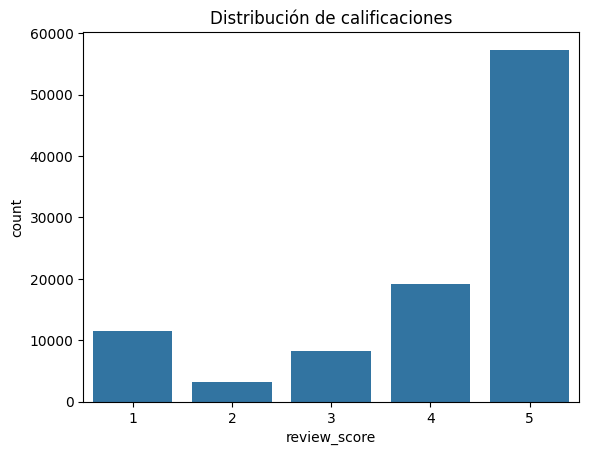

In [15]:
sns.countplot(data=reviews, x='review_score')
plt.title("Distribución de calificaciones")
plt.show()

Relación entre calificación y mensaje:

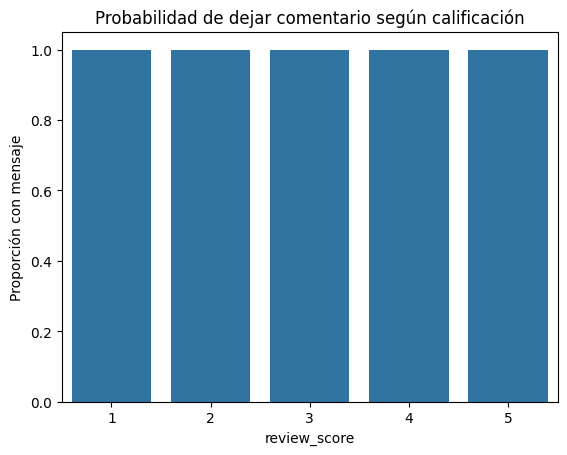

In [16]:
reviews['has_message'] = reviews['review_comment_message'].notnull()

sns.barplot(data=reviews, x='review_score', y='has_message')
plt.title("Probabilidad de dejar comentario según calificación")
plt.ylabel("Proporción con mensaje")
plt.show()

### Ya como para obtener mejores insights:
Customer Lifetime Value (CLV): Total gastado por cliente

    Data a analizar: customers + orders + order_items + order_payments

/tmp/ipykernel_42695/4182352468.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clv, x='customer_unique_id', y='lifetime_value', palette='viridis')


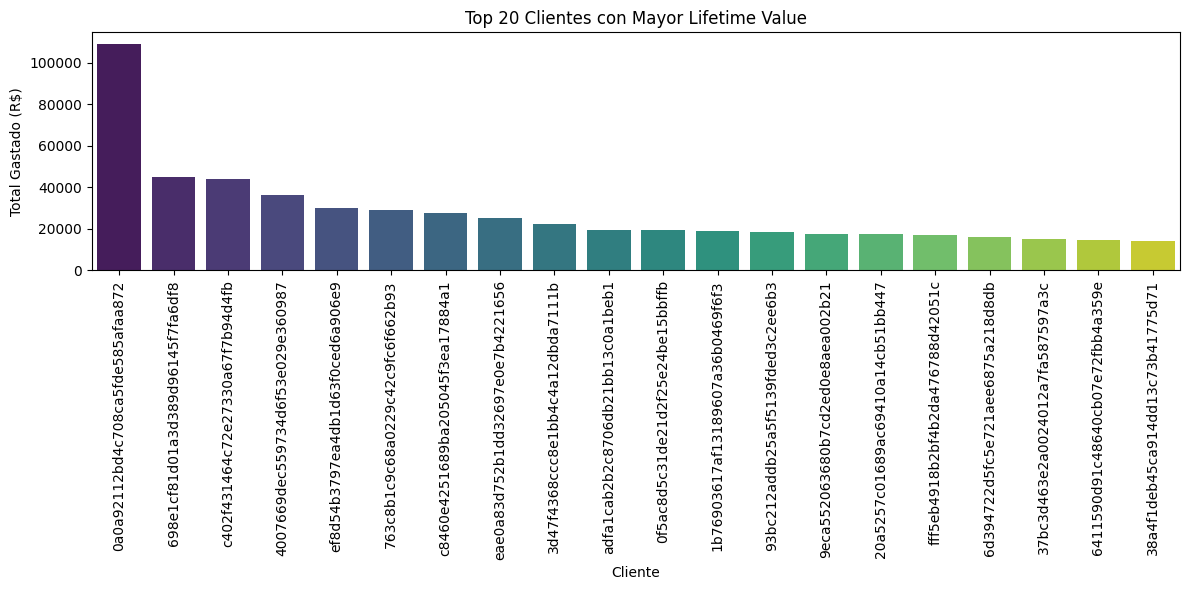

In [17]:
# Unir todo hasta cliente
clv = orders.merge(customers, on='customer_id') \
            .merge(order_items, on='order_id') \
            .merge(payments, on='order_id')

# Calcular gasto total por cliente
clv_summary = clv.groupby('customer_unique_id')['payment_value'].sum().reset_index()
clv_summary.columns = ['customer_unique_id', 'lifetime_value']

# Top 20 clientes
top_clv = clv_summary.sort_values(by='lifetime_value', ascending=False).head(20)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clv, x='customer_unique_id', y='lifetime_value', palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 20 Clientes con Mayor Lifetime Value")
plt.ylabel("Total Gastado (R$)")
plt.xlabel("Cliente")
plt.tight_layout()
plt.show()

Satisfacción vs tiempo de entrega

     Data a usar: order_reviews + orders

/tmp/ipykernel_42695/1003913494.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=review_merge, x='review_score', y='delivery_days', palette='coolwarm')


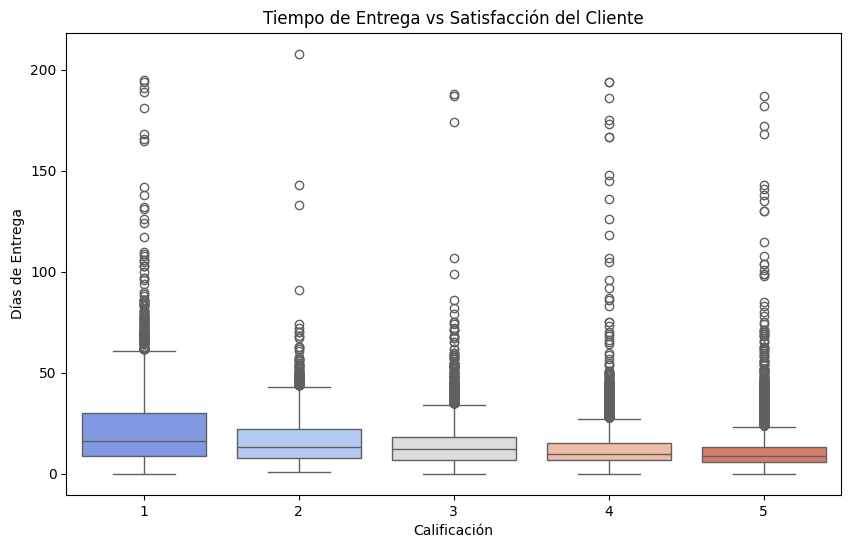

In [18]:
# Convertir fechas
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Calcular días de entrega
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Merge con reviews
review_merge = reviews.merge(orders, on='order_id')
review_merge = review_merge.dropna(subset=['delivery_days'])  # Eliminar NaNs

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=review_merge, x='review_score', y='delivery_days', palette='coolwarm')
plt.title("Tiempo de Entrega vs Satisfacción del Cliente")
plt.xlabel("Calificación")
plt.ylabel("Días de Entrega")
plt.show()

Promedio de valor por pedido vs categoría

     Data a usar: products + order_items

/tmp/ipykernel_42695/1930173399.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_by_cat.values, y=price_by_cat.index, palette='magma')


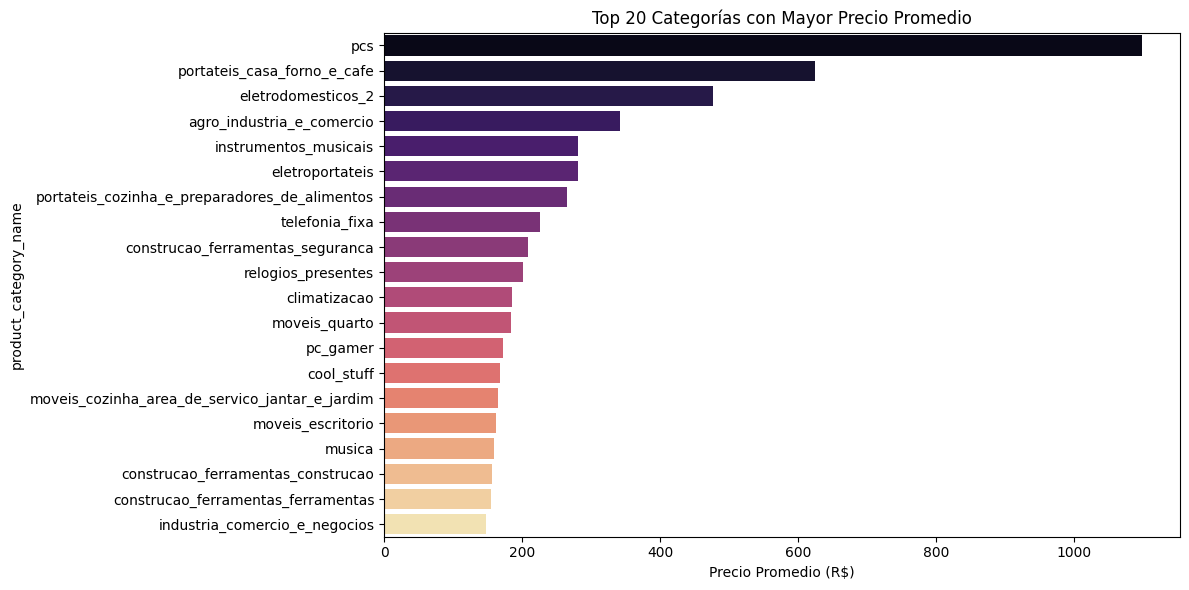

In [19]:
# Merge productos y orden
product_price = order_items.merge(products, on='product_id')

# Calcular promedio del valor por categoría
price_by_cat = product_price.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(20)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=price_by_cat.values, y=price_by_cat.index, palette='magma')
plt.xlabel("Precio Promedio (R$)")
plt.title("Top 20 Categorías con Mayor Precio Promedio")
plt.tight_layout()
plt.show()


Comportamiento mensual/semanal de órdenes

     Data a usar: orders

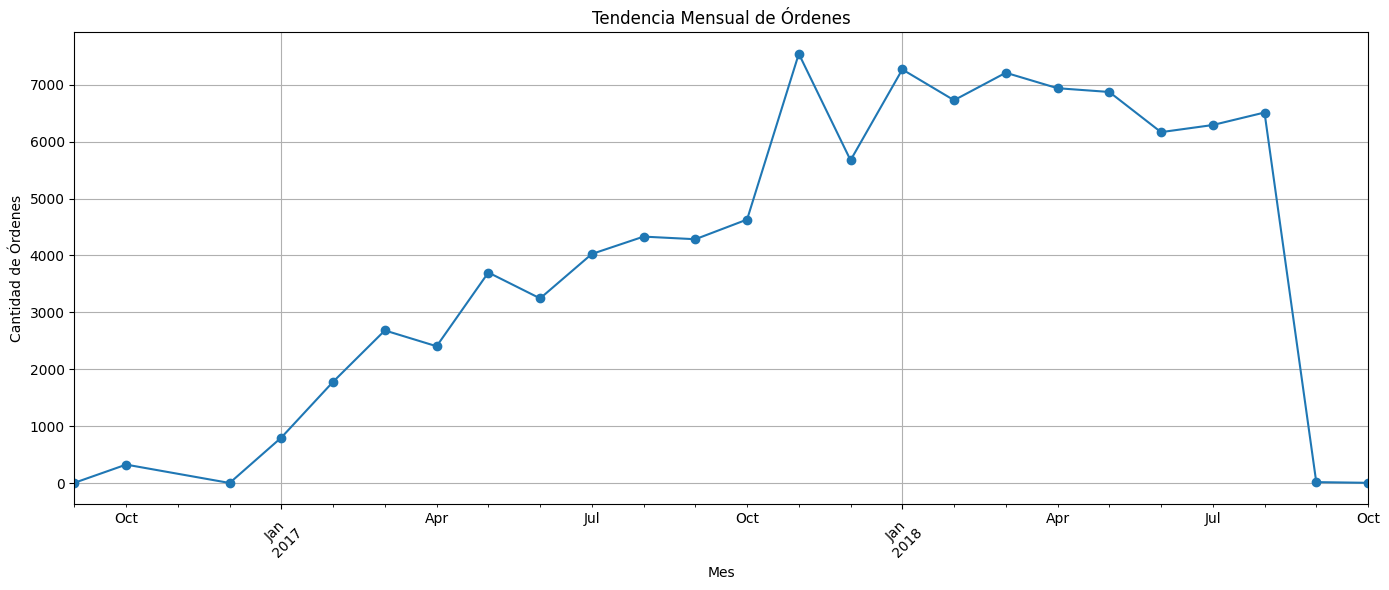

In [20]:
# Ordenes por mes
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders.groupby('month')['order_id'].count()

# Gráfico de tendencia
plt.figure(figsize=(14, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title("Tendencia Mensual de Órdenes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Órdenes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis de correlación de características

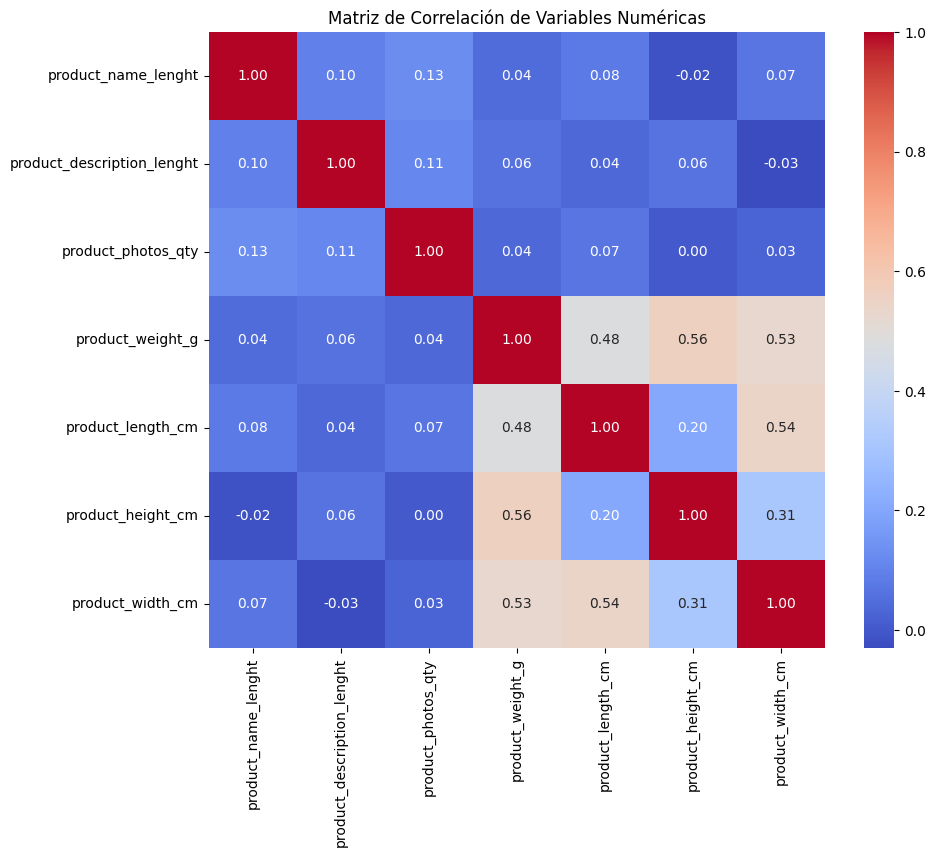

In [21]:
# Vamos a hacerla con la tabla de productos
# Filtrar solo las columnas numéricas
numeric_cols = products.select_dtypes(include='number')
# Calcular correlación
corr_matrix = numeric_cols.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

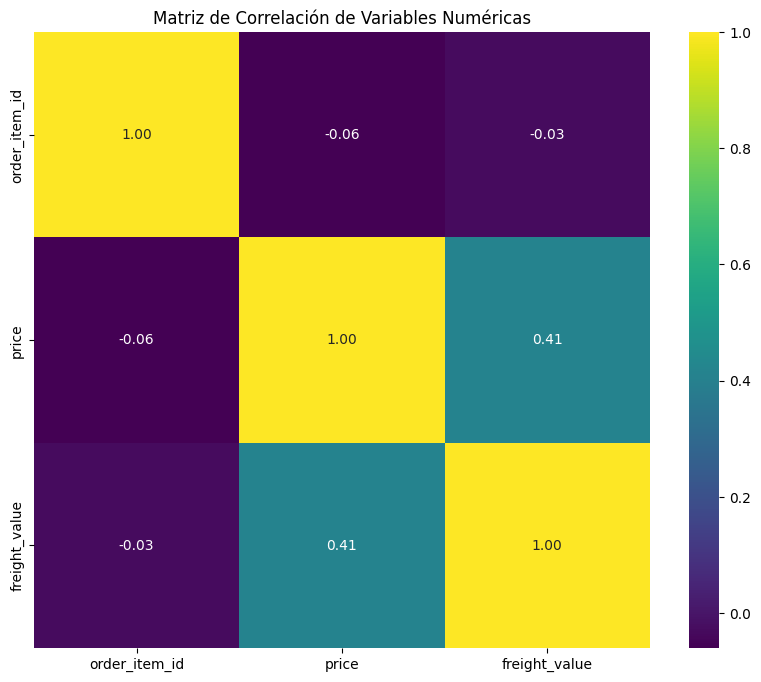

In [22]:
numeric_cols = order_items.select_dtypes(include='number')
# Calcular correlación
corr_matrix = numeric_cols.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

##### Ahora que ya vimos el uso de merge y consultas complejas pues podriamos:
Construir un dataset combinado para correlaciones más útiles

unir orders + payments + reviews para correlacionar:

    tiempo de entrega

    valor pagado

    score recibido

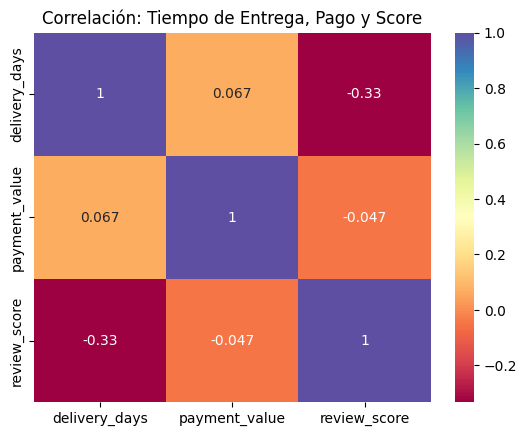

In [23]:
# Convertimos timestamps primero
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Calcular días de entrega
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Merge con pagos y reviews
combo = orders.merge(payments, on='order_id').merge(reviews, on='order_id')

# Solo columnas numéricas relevantes
cols_to_use = ['delivery_days', 'payment_value', 'review_score']
combo_corr = combo[cols_to_use].corr()

# Graficar
sns.heatmap(combo_corr, annot=True, cmap='Spectral')
plt.title("Correlación: Tiempo de Entrega, Pago y Score")
plt.show()


Mmm no se correlacionaron mucho estas la verdad. Pero es bueno saberlo.
#### Ahora nos podriamos tirar a hacer uno enorme con todas las variables importantes a analizar..
Para ello tenemos que hacer un merge gigante.

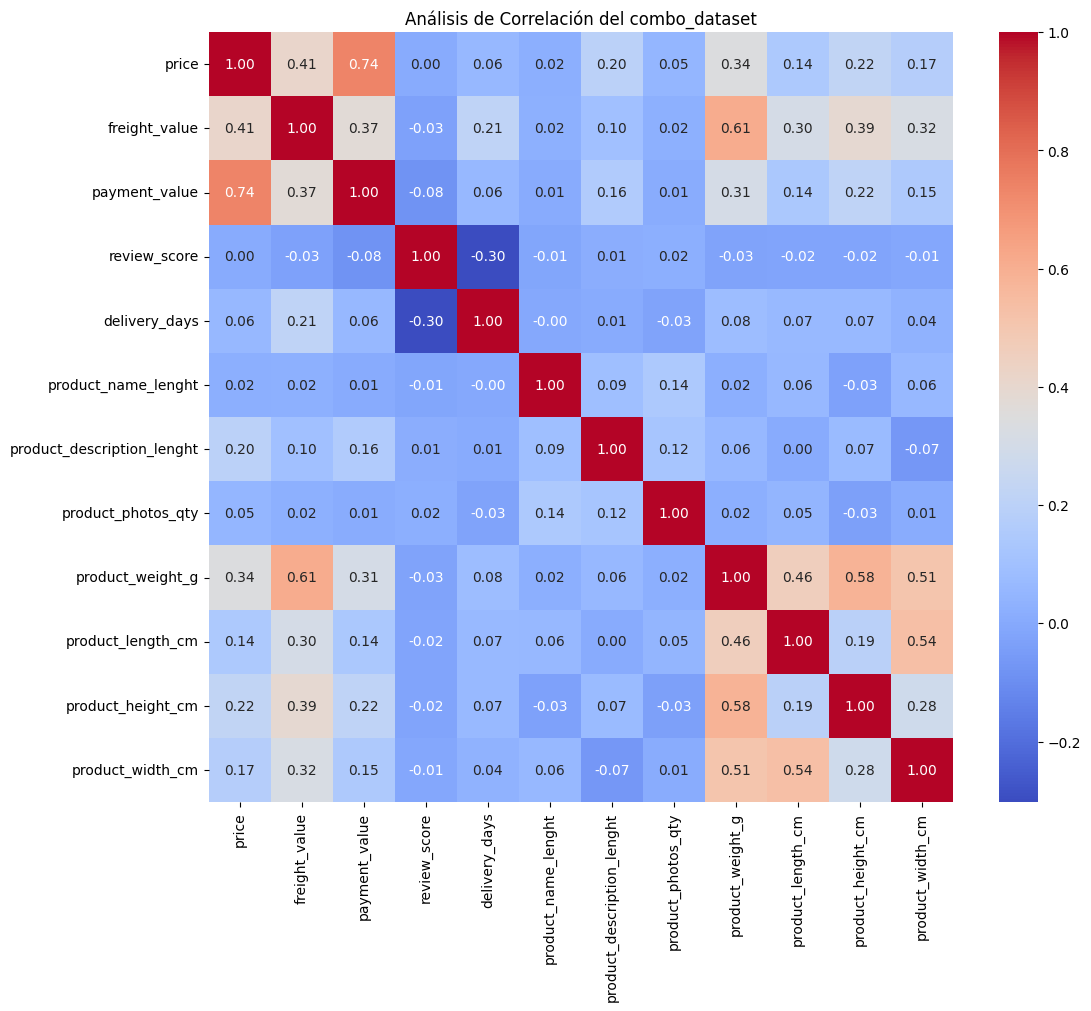

In [24]:
# mergeamos
combo = orders.merge(order_items, on='order_id', how='inner') \
              .merge(payments, on='order_id', how='left') \
              .merge(reviews, on='order_id', how='left') \
              .merge(customers, on='customer_id', how='left') \
              .merge(products, on='product_id', how='left')

# Convertimos fechas
combo['order_purchase_timestamp'] = pd.to_datetime(combo['order_purchase_timestamp'])
combo['order_delivered_customer_date'] = pd.to_datetime(combo['order_delivered_customer_date'])

# Tiempo de entrega
combo['delivery_days'] = (combo['order_delivered_customer_date'] - combo['order_purchase_timestamp']).dt.days

# Año, mes, día para análisis temporal
combo['order_year'] = combo['order_purchase_timestamp'].dt.year
combo['order_month'] = combo['order_purchase_timestamp'].dt.month
combo['order_day'] = combo['order_purchase_timestamp'].dt.day


corr_cols = [
    'price', 'freight_value', 'payment_value',
    'review_score', 'delivery_days',
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

# existan y no estén vacías
combo_corr = combo[corr_cols].dropna()


plt.figure(figsize=(12,10))
sns.heatmap(combo_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Análisis de Correlación del combo_dataset")
plt.show()
